<a href="https://colab.research.google.com/github/vasudeva4040/Homework1/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

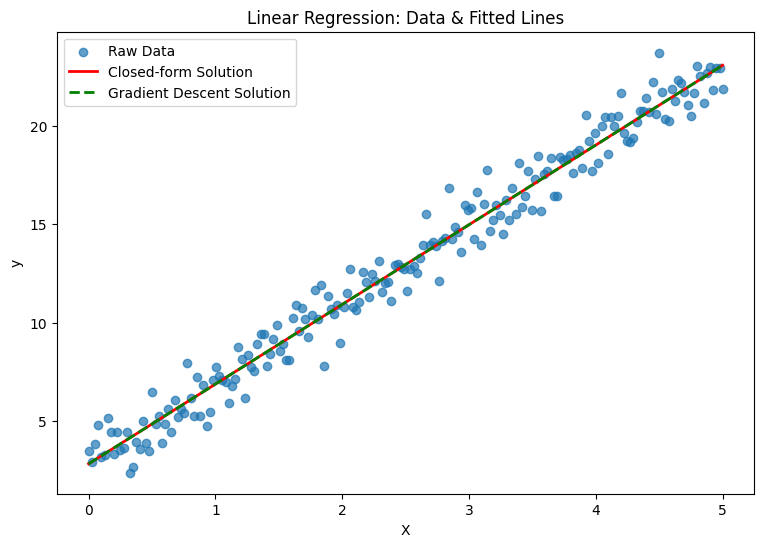

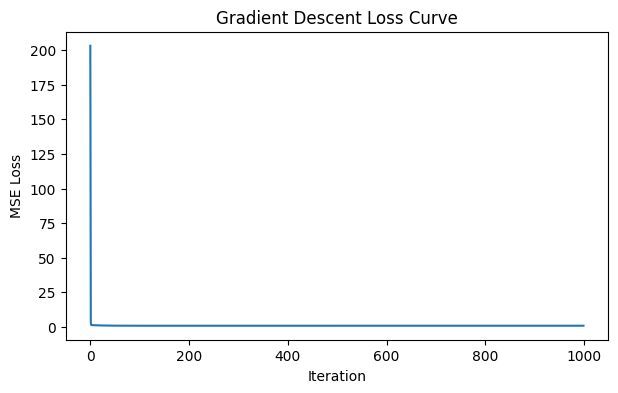

Closed-form solution: Intercept=2.8452, Slope=4.0456
Gradient descent: Intercept=2.8452, Slope=4.0456
Both Gradient Descent and the Closed-form solution yield nearly identical parameters, confirming convergence. Gradient Descent's loss curve shows smooth decrease and eventual stabilization, indicating successful optimization on this dataset.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
np.random.seed(42)
N = 200
X = np.linspace(0, 5, N)
epsilon = np.random.normal(0, 1, N)
y = 3 + 4*X + epsilon

# Add bias column to X
X_b = np.c_[np.ones(N), X]

# 2. Closed-form solution (Normal Equation)
theta_closed = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_closed, slope_closed = theta_closed

# Predicted line (Normal Equation)
y_pred_closed = X_b.dot(theta_closed)

# 3. Gradient Descent implementation
theta_gd = np.zeros(2)
learning_rate = 0.05
n_iters = 1000
losses = []

for i in range(n_iters):
    y_pred = X_b.dot(theta_gd)
    error = y_pred - y
    gradients = 2/N * X_b.T.dot(error)
    theta_gd = theta_gd - learning_rate * gradients
    mse = np.mean(error**2)
    losses.append(mse)

intercept_gd, slope_gd = theta_gd
y_pred_gd = X_b.dot(theta_gd)

# 4. Plot raw data, closed-form fitted line, gradient descent fitted line
plt.figure(figsize=(9,6))
plt.scatter(X, y, label='Raw Data', alpha=0.7)
plt.plot(X, y_pred_closed, color='red', label='Closed-form Solution', linewidth=2)
plt.plot(X, y_pred_gd, color='green', label='Gradient Descent Solution', linewidth=2, linestyle='dashed')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Data & Fitted Lines')
plt.show()

# Loss curve (MSE vs iteration)
plt.figure(figsize=(7,4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

# 5. Print final results
print(f"Closed-form solution: Intercept={intercept_closed:.4f}, Slope={slope_closed:.4f}")
print(f"Gradient descent: Intercept={intercept_gd:.4f}, Slope={slope_gd:.4f}")

# 6. Short explanation
print("Both Gradient Descent and the Closed-form solution yield nearly identical parameters, confirming convergence. Gradient Descent's loss curve shows smooth decrease and eventual stabilization, indicating successful optimization on this dataset.")
